In [1]:
import json
# import pandas as pd
import os
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# pd.set_option('display.float_format', '{:.5g}'.format)
# %matplotlib widget

In [2]:
channel_type = 'markov'
if channel_type == 'awgn':
    file_list = [
        '../results/turbo-155-7_hazzys.2021-12-20.15-51-18.json', 
        '../results/turboae-binary-exact_basic.2021-12-20.18-18-39.json', 
        '../results/turboae-binary-exact-rsc_hazzys.2021-12-20.15-51-25.json', 
        # '../results/turbo-lte_basic.2021-12-21.04-46-08.json',
        '../results/turbo-lte_hazzys.2021-12-21.02-38-29.json',
        # '../results/turbo-155-7_basic.2021-12-21.06-52-43.json'
    ]
# additive t
if channel_type == 'atn':
    file_list = [
        '../results/turboae-binary-exact-rsc_hazzys.2021-12-21.12-20-45.json',
        '../results/turbo-lte_hazzys.2021-12-21.16-13-37.json',
        '../results/turbo-155-7_hazzys.2021-12-21.12-20-07.json'
    ]
# non-iid markovian all bad test
# file_list = [
#     '../results/turbo-155-7_hazzys.2021-12-22.04-15-49.json',
# ]
# non-iid markovian test p_bg = 0.8 p_gb = 0.8
if channel_type == 'markov':
    file_list = [
        '../results/turbo-155-7_hazzys.2021-12-22.02-18-32.json',
        '../results/turbo-lte_hazzys.2021-12-21.21-55-11.json',
        '../results/turboae-binary-exact-rsc_hazzys.2021-12-21.21-55-21.json',
    ]

In [3]:
json_list = []
for filename in file_list:
    with open(filename, 'r') as f:
        json_list.append(json.load(f))

In [4]:
data = defaultdict(lambda: defaultdict(list))
for test_set in json_list:
    for test in test_set:
        snr = test["test_run_settings"]["encoder_decoder_settings"]["channel"]["snr"]
        ber = test["stats"]["ber"]
        bler = test["stats"]["bler"]
        ber_var = test["stats"]["ber_var"]
        bler_var = test["stats"]["bler_var"]
        num_block = test["stats"]["num_blocks"]
        model_id = test["model_id"]
        model_name = model_id.split('.')[0]

        data[model_name][snr].append({"ber": ber, "bler": bler, "bler_var": bler_var, "ber_var": ber_var, "num_block": num_block})



test_runs = [test for  jsondict in json_list for test in jsondict]
# snrs = [test["test_run_settings"]["encoder_decoder_settings"]["channel"]["snr"] for test in test_runs]
# bers = [test["stats"]["ber"] for test in test_runs]
# blers = [test["stats"]["bler"] for test in test_runs]
# ber_vars = [test["stats"]["ber_var"] for test in test_runs]
# bler_vars = [test["stats"]["bler_var"] for test in test_runs]
num_blocks = [test["stats"]["num_blocks"] for test in test_runs]
num_iters = [test["test_run_settings"]["encoder_decoder_settings"]["num_iter"] for test in test_runs]
# model_ids = [test["model_id"] for test in test_runs]

In [5]:
assert all(1000000 == i for i in num_blocks)
assert all(6 == i for i in num_iters)

In [6]:
snr_for_model = defaultdict(list)
plot_ber_data = defaultdict(list)
plot_bler_data = defaultdict(list)
ber_var_data = defaultdict(list)
plot_ber_error_bar_widths = defaultdict(list)
plot_bler_error_bar_widths = defaultdict(list)
bler_var_data = defaultdict(list)

for model in data:
    for snr in sorted(s for s in data[model].keys()):
        if len(data[model][snr]) > 0:
            tot_blocks = sum([d['num_block'] for d in data[model][snr]])
            mean_ber = sum([d['ber'] * d['num_block'] for d in data[model][snr]]) / tot_blocks
            mean_bler = sum([d['bler'] * d['num_block'] for d in data[model][snr]]) / tot_blocks
            mean_ber_sample_var = sum([d['ber_var'] * (d['num_block'] - 1) for d in data[model][snr]]) / (tot_blocks - 1)
            mean_bler_sample_var = sum([d['bler_var'] * (d['num_block'] - 1) for d in data[model][snr]]) / (tot_blocks - 1)
            
            ber_error_bar_width = np.sqrt(mean_ber_sample_var / tot_blocks) * 2
            bler_error_bar_width = np.sqrt(mean_bler_sample_var / tot_blocks) * 2

            snr_for_model[model].append(snr)
            plot_ber_data[model].append(mean_ber)
            plot_bler_data[model].append(mean_bler)
            ber_var_data[model].append(mean_ber_sample_var)
            bler_var_data[model].append(mean_bler_sample_var)
            plot_ber_error_bar_widths[model].append(ber_error_bar_width)
            plot_bler_error_bar_widths[model].append(bler_error_bar_width)


In [7]:
some_model = next((i for i in snr_for_model.keys()))
print(some_model)
# display(snr_for_model[some_model])
# display(plot_ber_data[some_model])
# display(plot_bler_data[some_model])
# display(ber_var_data[some_model])
# display(bler_var_data[some_model])
# display(plot_ber_error_bar_widths[some_model])
# display(plot_bler_error_bar_widths[some_model])

turbo-155-7_hazzys


In [8]:
for model in snr_for_model:
    print(model)

turbo-155-7_hazzys
turbo-lte_hazzys
turboae-binary-exact-rsc_hazzys


In [9]:
TURBO_155_7_HAZZYS = 'turbo-155-7_hazzys'
TURBOAE_BINARY_EXACT_BASIC = 'turboae-binary-exact_basic'
TURBOAE_BINARY_EXACT_RSC_HAZZYS = 'turboae-binary-exact-rsc_hazzys'
TURBO_LTE_HAZZYS = 'turbo-lte_hazzys'

turbo_155_7_save_data = {
    "snrs":snr_for_model[TURBO_155_7_HAZZYS], 
    "ber_mean":plot_ber_data[TURBO_155_7_HAZZYS], 
    "ber_var":ber_var_data[TURBO_155_7_HAZZYS],
    "ber_error_bar_width":plot_ber_error_bar_widths[TURBO_155_7_HAZZYS],
    "bler_mean":plot_bler_data[TURBO_155_7_HAZZYS], 
    "bler_var":bler_var_data[TURBO_155_7_HAZZYS],
    "bler_error_bar_width":plot_bler_error_bar_widths[TURBO_155_7_HAZZYS],
    "num_blocks": 1000000
}

turbo_lte_save_data = {
    "snrs":snr_for_model[TURBO_LTE_HAZZYS], 
    "ber_mean":plot_ber_data[TURBO_LTE_HAZZYS], 
    "ber_var":ber_var_data[TURBO_LTE_HAZZYS],
    "ber_error_bar_width":plot_ber_error_bar_widths[TURBO_LTE_HAZZYS],
    "bler_mean":plot_bler_data[TURBO_LTE_HAZZYS], 
    "bler_var":bler_var_data[TURBO_LTE_HAZZYS],
    "bler_error_bar_width":plot_bler_error_bar_widths[TURBO_LTE_HAZZYS],
    "num_blocks": 1000000
}


turboae_binary_exact_rsc_save_data = {
    "snrs":snr_for_model[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    "ber_mean":plot_ber_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    "ber_var":ber_var_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS],
    "ber_error_bar_width":plot_ber_error_bar_widths[TURBOAE_BINARY_EXACT_RSC_HAZZYS],
    "bler_mean":plot_bler_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    "bler_var":bler_var_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS],
    "bler_error_bar_width":plot_bler_error_bar_widths[TURBOAE_BINARY_EXACT_RSC_HAZZYS],
    "num_blocks": 1000000
}
if channel_type == 'awgn':
    turboae_binary_exact_nonsys_save_data = {
        "snrs":snr_for_model[TURBOAE_BINARY_EXACT_BASIC], 
        "ber_mean":plot_ber_data[TURBOAE_BINARY_EXACT_BASIC], 
        "ber_var":ber_var_data[TURBOAE_BINARY_EXACT_BASIC],
        "ber_error_bar_width":plot_ber_error_bar_widths[TURBOAE_BINARY_EXACT_BASIC],
        "bler_mean":plot_bler_data[TURBOAE_BINARY_EXACT_BASIC], 
        "bler_var":bler_var_data[TURBOAE_BINARY_EXACT_BASIC],
        "bler_error_bar_width":plot_bler_error_bar_widths[TURBOAE_BINARY_EXACT_BASIC],
        "num_blocks": 1000000
    }

import json

with open(f'../plot_inputs/turbo_155_7_{channel_type}_results.json', 'w') as f:
    json.dump(turbo_155_7_save_data, f)
with open(f'../plot_inputs/turboae_binary_exact_rsc_{channel_type}_results.json', 'w') as f:
    json.dump(turboae_binary_exact_rsc_save_data, f)
if channel_type == 'awgn':
    with open(f'../plot_inputs/turboae_binary_exact_nonsys_save_data_{channel_type}_results.json', 'w') as f:
        json.dump(turboae_binary_exact_nonsys_save_data, f)
with open(f'../plot_inputs/turbo_lte_save_data_{channel_type}_results.json', 'w') as f:
    json.dump(turbo_lte_save_data, f)



In [10]:
TURBO_BENCHMARK_PAPER = 'turbo-benchmark-paper'
benchmark_paper_snrs = [-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,]
benchmark_paper_bers = [6.00E-02, 3.00E-02, 1.00E-02, 4.00E-03, 8.00E-04, 2.00E-04, 7.00E-05, 3.00E-05, 1.10E-05, 5.00E-06, ]

TURBOAE_BINARY_PAPER = 'turboae-binary-paper'
turboae_binary_paper_snrs = [-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,]
turboae_binary_paper_bers = [8.00E-02, 4.00E-02, 1.10E-02, 4.00E-03, 8.00E-04, 3.00E-04, 8.00E-05, 3.00E-05, 1.00E-05, 4.00E-06, ]

In [47]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mpl.rcParams['figure.dpi'] = 100
# plt.style.use('dark_background')

# plt.ioff()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])  # Last two terms control height and width
capsize = 2

TURBO_155_7_HAZZYS = 'turbo-155-7_hazzys'
TURBOAE_BINARY_EXACT_BASIC = 'turboae-binary-exact_basic'
TURBOAE_BINARY_EXACT_RSC_HAZZYS = 'turboae-binary-exact-rsc_hazzys'
# TURBO_LTE_BASIC = 'turbo-lte_basic'
TURBO_LTE_HAZZYS = 'turbo-lte_hazzys'
# TURBO_155_7_BASIC = 'turbo-155-7_basic'
l1 = ax.errorbar(
    snr_for_model[TURBO_155_7_HAZZYS], 
    plot_ber_data[TURBO_155_7_HAZZYS], 
    yerr=plot_ber_error_bar_widths[TURBO_155_7_HAZZYS], 
    linestyle='--',
    capsize=capsize,
    label=TURBO_155_7_HAZZYS
)
# l2 = ax.errorbar(
#     snr_for_model[TURBOAE_BINARY_EXACT_BASIC], 
#     plot_ber_data[TURBOAE_BINARY_EXACT_BASIC], 
#     yerr=plot_ber_error_bar_widths[TURBOAE_BINARY_EXACT_BASIC], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBOAE_BINARY_EXACT_BASIC
# )
l3 = ax.errorbar(
    snr_for_model[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    plot_ber_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    yerr=plot_ber_error_bar_widths[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    linestyle='-',
    capsize=capsize,
    label=TURBOAE_BINARY_EXACT_RSC_HAZZYS
)
# l4 = ax.plot(
#     benchmark_paper_snrs,
#     benchmark_paper_bers,
#     linestyle='-.',
#     label=TURBO_BENCHMARK_PAPER
# )
# l5 = ax.plot(
#     turboae_binary_paper_snrs,
#     turboae_binary_paper_bers,
#     linestyle='-.',
#     label=TURBOAE_BINARY_PAPER
# )
# l6 = ax.errorbar(
#     snr_for_model[TURBO_LTE_BASIC], 
#     plot_ber_data[TURBO_LTE_BASIC], 
#     yerr=plot_ber_error_bar_widths[TURBO_LTE_BASIC], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBO_LTE_BASIC
# )
l7 = ax.errorbar(
    snr_for_model[TURBO_LTE_HAZZYS], 
    plot_ber_data[TURBO_LTE_HAZZYS], 
    yerr=plot_ber_error_bar_widths[TURBO_LTE_HAZZYS], 
    linestyle='-',
    capsize=capsize,
    label=TURBO_LTE_HAZZYS
)
# l8 = ax.errorbar(
#     snr_for_model[TURBO_155_7_BASIC], 
#     plot_ber_data[TURBO_155_7_BASIC], 
#     yerr=plot_ber_error_bar_widths[TURBO_155_7_BASIC], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBO_155_7_BASIC
# )
ax.legend()
# ax.legend([l1, l2, l3], [TURBO_155_7_HAZZYS, TURBOAE_BINARY_EXACT_BASIC, TURBOAE_BINARY_EXACT_RSC_HAZZYS])

# for i, model in enumerate(snr_for_model):
#     ax.plot(snr_for_model[model], plot_ber_data[model])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ax.set_yscale('log')
# ax.xaxis.set_tick_params(which='major', size=5, width=1, direction='out')
# ax.xaxis.set_tick_params(which='minor', size=3, length=4, direction='in', top='on')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel('SNR')
ax.set_ylabel('BER')
ax.set_title('Turbo BER vs SNR on AWGN Channel')

# fig.savefig('awgn_results.png')
fig

In [48]:
# from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# mpl.rcParams['figure.dpi'] = 100

# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])  # Last two terms control height and width
# capsize = 2

# ax.errorbar(
#     snr_for_model[TURBO_155_7_HAZZYS], 
#     plot_bler_data[TURBO_155_7_HAZZYS], 
#     yerr=plot_bler_error_bar_widths[TURBO_155_7_HAZZYS], 
#     linestyle='--',
#     capsize=capsize,
#     label=TURBO_155_7_HAZZYS
# )
# # l2 = ax.errorbar(
# #     snr_for_model[TURBOAE_BINARY_EXACT_BASIC], 
# #     plot_bler_data[TURBOAE_BINARY_EXACT_BASIC], 
# #     yerr=plot_bler_error_bar_widths[TURBOAE_BINARY_EXACT_BASIC], 
# #     linestyle='-',
# #     capsize=capsize,
# #     label=TURBOAE_BINARY_EXACT_BASIC
# # )
# l3 = ax.errorbar(
#     snr_for_model[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
#     plot_bler_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
#     yerr=plot_bler_error_bar_widths[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBOAE_BINARY_EXACT_RSC_HAZZYS
# )
# # l4 = ax.plot(
# #     benchmark_paper_snrs,
# #     benchmark_paper_bers,
# #     linestyle='-.',
# #     label=TURBO_BENCHMARK_PAPER
# # )
# # l5 = ax.plot(
# #     turboae_binary_paper_snrs,
# #     turboae_binary_paper_bers,
# #     linestyle='-.',
# #     label=TURBOAE_BINARY_PAPER
# # )
# # l6 = ax.errorbar(
# #     snr_for_model[TURBO_LTE_BASIC], 
# #     plot_bler_data[TURBO_LTE_BASIC], 
# #     yerr=plot_bler_error_bar_widths[TURBO_LTE_BASIC], 
# #     linestyle='-',
# #     capsize=capsize,
# #     label=TURBO_LTE_BASIC
# # )
# l7 = ax.errorbar(
#     snr_for_model[TURBO_LTE_HAZZYS], 
#     plot_bler_data[TURBO_LTE_HAZZYS], 
#     yerr=plot_bler_error_bar_widths[TURBO_LTE_HAZZYS], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBO_LTE_HAZZYS
# )
# # l8 = ax.errorbar(
# #     snr_for_model[TURBO_155_7_BASIC], 
# #     plot_bler_data[TURBO_155_7_BASIC], 
# #     yerr=plot_bler_error_bar_widths[TURBO_155_7_BASIC], 
# #     linestyle='-',
# #     capsize=capsize,
# #     label=TURBO_155_7_BASIC
# # )
# ax.legend()
# # ax.legend([l1, l2, l3], [TURBO_155_7_HAZZYS, TURBOAE_BINARY_EXACT_BASIC, TURBOAE_BINARY_EXACT_RSC_HAZZYS])

# # for i, model in enumerate(snr_for_model):
# #     ax.plot(snr_for_model[model], plot_ber_data[model])
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_yscale('log')
# # ax.xaxis.set_tick_params(which='major', size=5, width=1, direction='out')
# # ax.xaxis.set_tick_params(which='minor', size=3, length=4, direction='in', top='on')
# ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax.set_xlabel('SNR')
# ax.set_ylabel('BLER')
# ax.set_title('Turbo BLER vs SNR on Markovian-AWGN Channel')

# fig

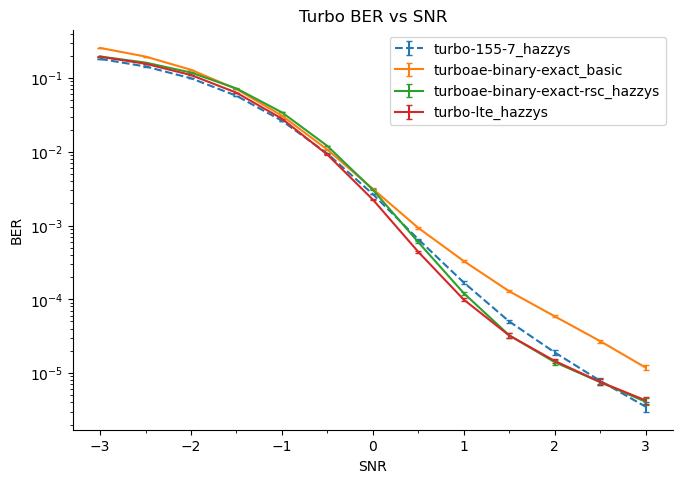

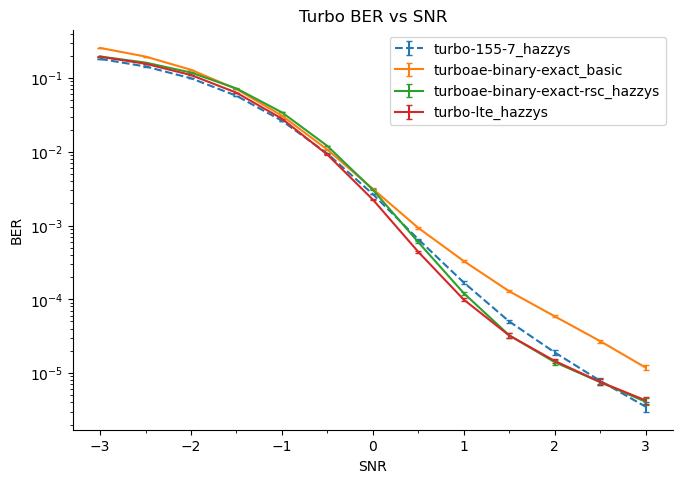

In [15]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mpl.rcParams['figure.dpi'] = 100
# plt.style.use('dark_background')

# plt.ioff()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])  # Last two terms control height and width
capsize = 2

TURBO_155_7_HAZZYS = 'turbo-155-7_hazzys'
# TURBOAE_BINARY_EXACT_BASIC = 'turboae-binary-exact_basic'
TURBOAE_BINARY_EXACT_RSC_HAZZYS = 'turboae-binary-exact-rsc_hazzys'
# TURBO_LTE_BASIC = 'turbo-lte_basic'
TURBO_LTE_HAZZYS = 'turbo-lte_hazzys'
# TURBO_155_7_BASIC = 'turbo-155-7_basic'
l1 = ax.errorbar(
    snr_for_model[TURBO_155_7_HAZZYS], 
    plot_ber_data[TURBO_155_7_HAZZYS], 
    yerr=plot_ber_error_bar_widths[TURBO_155_7_HAZZYS], 
    linestyle='--',
    capsize=capsize,
    label=TURBO_155_7_HAZZYS
)
l2 = ax.errorbar(
    snr_for_model[TURBOAE_BINARY_EXACT_BASIC], 
    plot_ber_data[TURBOAE_BINARY_EXACT_BASIC], 
    yerr=plot_ber_error_bar_widths[TURBOAE_BINARY_EXACT_BASIC], 
    linestyle='-',
    capsize=capsize,
    label=TURBOAE_BINARY_EXACT_BASIC
)
l3 = ax.errorbar(
    snr_for_model[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    plot_ber_data[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    yerr=plot_ber_error_bar_widths[TURBOAE_BINARY_EXACT_RSC_HAZZYS], 
    linestyle='-',
    capsize=capsize,
    label=TURBOAE_BINARY_EXACT_RSC_HAZZYS
)
# l4 = ax.plot(
#     benchmark_paper_snrs,
#     benchmark_paper_bers,
#     linestyle='-.',
#     label=TURBO_BENCHMARK_PAPER
# )
# l5 = ax.plot(
#     turboae_binary_paper_snrs,
#     turboae_binary_paper_bers,
#     linestyle='-.',
#     label=TURBOAE_BINARY_PAPER
# )
# l6 = ax.errorbar(
#     snr_for_model[TURBO_LTE_BASIC], 
#     plot_ber_data[TURBO_LTE_BASIC], 
#     yerr=plot_ber_error_bar_widths[TURBO_LTE_BASIC], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBO_LTE_BASIC
# )
l7 = ax.errorbar(
    snr_for_model[TURBO_LTE_HAZZYS], 
    plot_ber_data[TURBO_LTE_HAZZYS], 
    yerr=plot_ber_error_bar_widths[TURBO_LTE_HAZZYS], 
    linestyle='-',
    capsize=capsize,
    label=TURBO_LTE_HAZZYS
)
# l8 = ax.errorbar(
#     snr_for_model[TURBO_155_7_BASIC], 
#     plot_ber_data[TURBO_155_7_BASIC], 
#     yerr=plot_ber_error_bar_widths[TURBO_155_7_BASIC], 
#     linestyle='-',
#     capsize=capsize,
#     label=TURBO_155_7_BASIC
# )
ax.legend()
# ax.legend([l1, l2, l3], [TURBO_155_7_HAZZYS, TURBOAE_BINARY_EXACT_BASIC, TURBOAE_BINARY_EXACT_RSC_HAZZYS])

# for i, model in enumerate(snr_for_model):
#     ax.plot(snr_for_model[model], plot_ber_data[model])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ax.set_yscale('log')
# ax.xaxis.set_tick_params(which='major', size=5, width=1, direction='out')
# ax.xaxis.set_tick_params(which='minor', size=3, length=4, direction='in', top='on')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel('SNR')
ax.set_ylabel('BER')
ax.set_title('Turbo BER vs SNR')

fig